In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

    #导入相关文件
    data1 = pd.read_table("../data/data_2015_1.txt", header = None)
    data1.columns = ['id','kind','time']
    data2 = pd.read_table("../data/data_2015_2.txt", header = None)
    data2.columns = ['id','kind','time']
    data3 = pd.read_table("../data/data_2015_3.txt", header = None)
    data3.columns = ['id','kind','time']
    data4 = pd.read_table("../data/data_2015_4.txt", header = None)
    data4.columns = ['id','kind','time']
    data5 = pd.read_table("../data/data_2015_5.txt", header = None)
    data5.columns = ['id','kind','time']

    data = pd.concat((data1,data2,data3,data4,data5))
    del data['id']

    data['time'] = data['time'].apply(lambda x :pd.to_datetime(x[:10], format = '%Y-%m-%d'))
    data['cnt'] = 1
    data = data.groupby(['kind','time']).sum().reset_index()
    data['kind_num'] = data['kind'].apply(lambda x: int(x[6:]))
    data = data.sort_values(by = ['kind_num','time'])
    data.index = list(range(len(data)))

    flavor_kind = data['kind'].unique().tolist()

    plt.subplots(nrows=len(flavor_kind), ncols=1,figsize=(32,32))
    val = 1
    for flavor in flavor_kind:
        plt.subplot(len(flavor_kind),1,val)
        plt.plot(data[data['kind'] == flavor]['time'],data[data['kind'] == flavor]['cnt'],label = flavor)
        plt.title(flavor)
        val += 1

    data.to_csv("../data/data.csv",index=None)

In [2]:
#导入相关文件
data1 = pd.read_table("../data/data_2015_5.txt", header = None)
data1.columns = ['id','kind','time']
data2 = pd.read_table("../data/data_2015_6.txt", header = None)
data2.columns = ['id','kind','time']

data = pd.concat((data1,data2))
del data['id']

data['time'] = data['time'].apply(lambda x :pd.to_datetime(x[:10], format = '%Y-%m-%d'))
data['cnt'] = 1
data = data.groupby(['kind','time']).sum().reset_index()
data['kind_num'] = data['kind'].apply(lambda x: int(x[6:]))
data = data.sort_values(by = ['kind_num','time'])
data.index = list(range(len(data)))

/home/chenxl/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


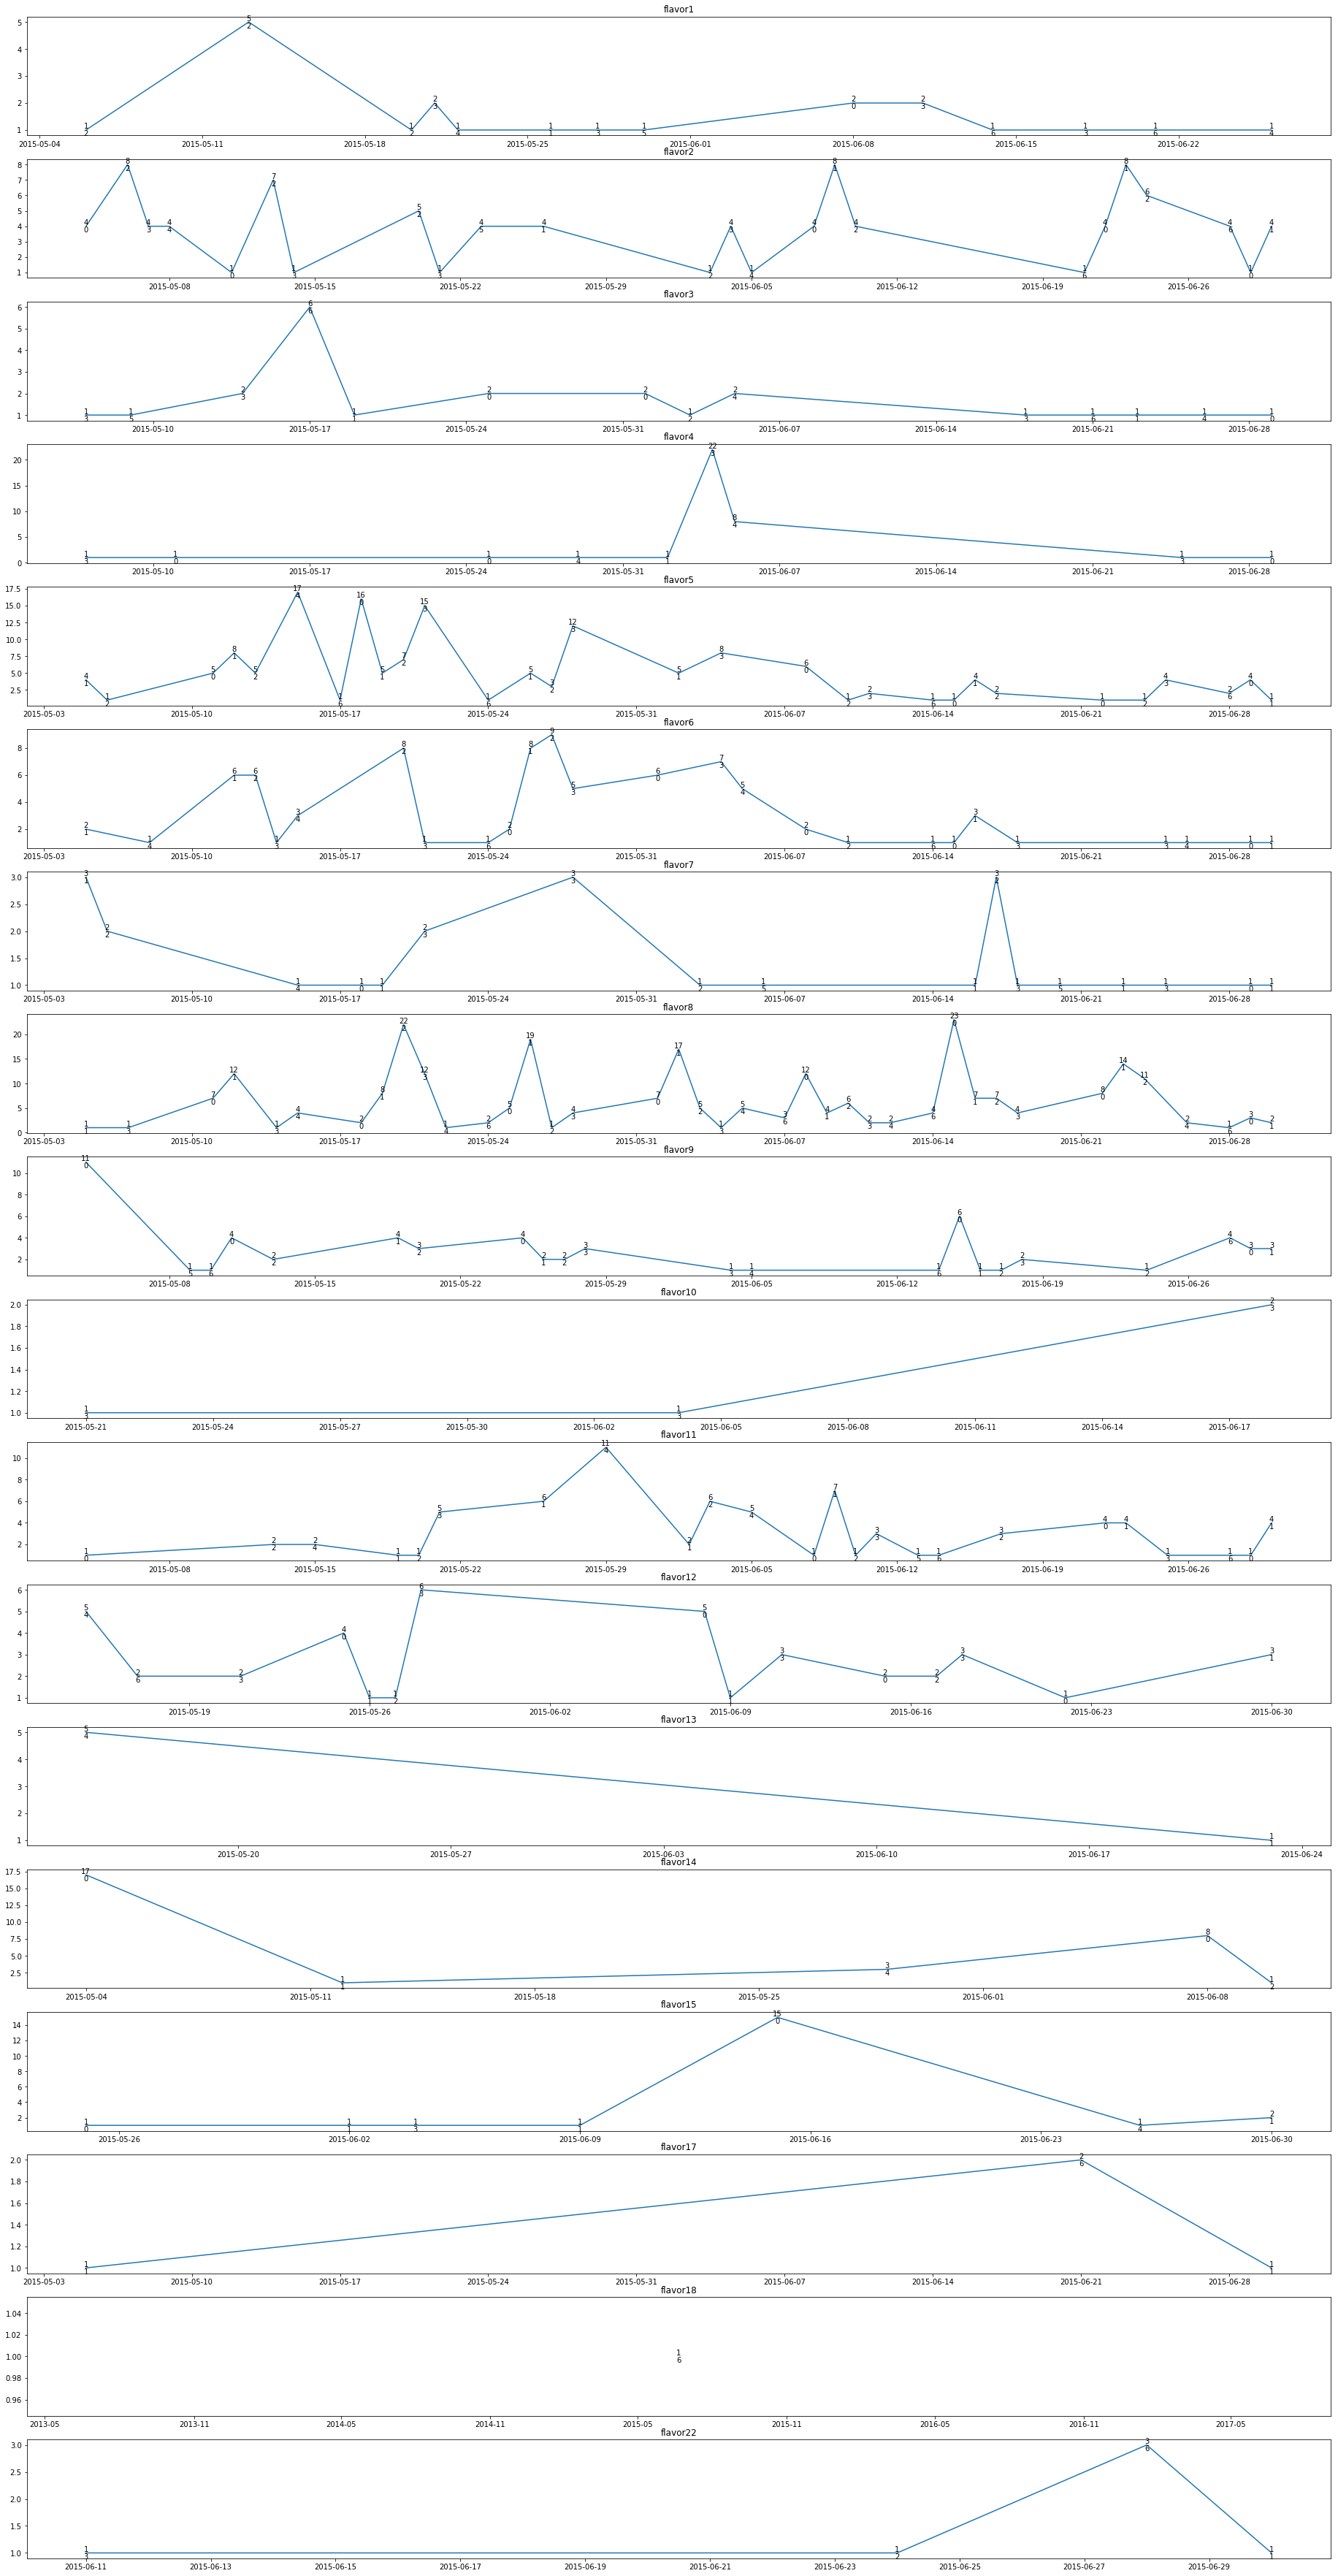

In [3]:
flavor_kind = data['kind'].unique().tolist()

plt.subplots(nrows=len(flavor_kind), ncols=1,figsize=(32,64))
val = 1
for flavor in flavor_kind:
    plt.subplot(len(flavor_kind),1,val)
    plt.plot(data[data['kind'] == flavor]['time'],data[data['kind'] == flavor]['cnt'],label = flavor)
    for x, y in zip(data[data['kind'] == flavor]['time'],data[data['kind'] == flavor]['cnt']):
        plt.text(x, y, '%d' % y,ha = 'center', va = 'bottom')
        plt.text(x, y, '%d' % x.dayofweek,ha = 'center', va = 'top')
    plt.title(flavor)
    val += 1

In [4]:
data.head()

,kind,time,cnt,kind_num
0,flavor1,2015-05-06,1,1
1,flavor1,2015-05-13,5,1
2,flavor1,2015-05-20,1,1
3,flavor1,2015-05-21,2,1
4,flavor1,2015-05-22,1,1


In [5]:
data_total = data.groupby(['time']).sum().reset_index()
del data_total['kind_num']

In [6]:
data_total.head()

,time,cnt
0,2015-05-04,33
1,2015-05-05,11
2,2015-05-06,12
3,2015-05-07,7
4,2015-05-08,5


/home/chenxl/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


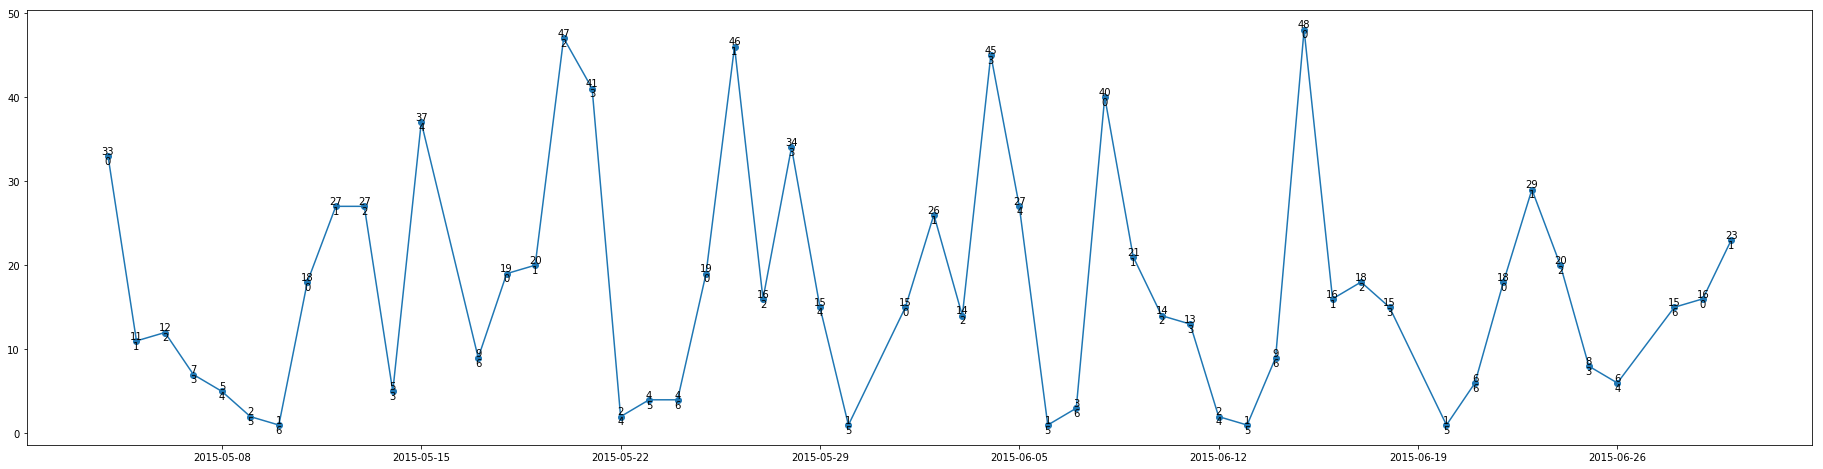

In [7]:
plt.subplots(figsize=(32,8))
plt.plot(data_total['time'],data_total['cnt'],'-o')
for x, y in zip(data_total['time'], data_total['cnt']):
    plt.text(x, y, '%d' % y,ha = 'center', va = 'bottom')
    plt.text(x, y, '%d' % x.dayofweek ,ha = 'center', va = 'top')

In [8]:
data.to_csv("../data/data.csv",index=None)